In [2]:
from tests.test_nn_classification import test_classification
from ml_p2.utils.data_generation import load_classification_data
from ml_p2.utils.grid_search_nn import grid_search_nn
from ml_p2.neural_network.ffnn import NeuralNetwork
from ml_p2.visualization.classification_plots import plot_accuracy_heatmap

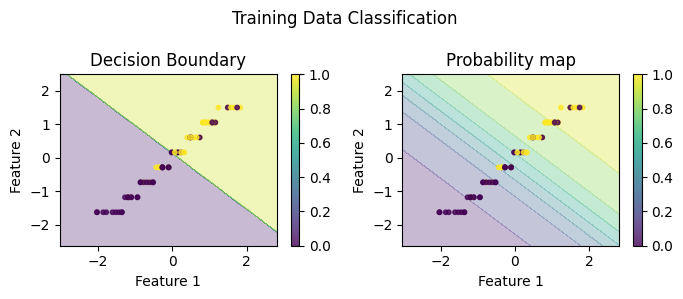

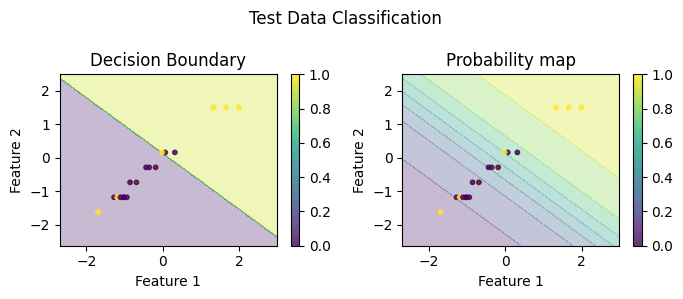

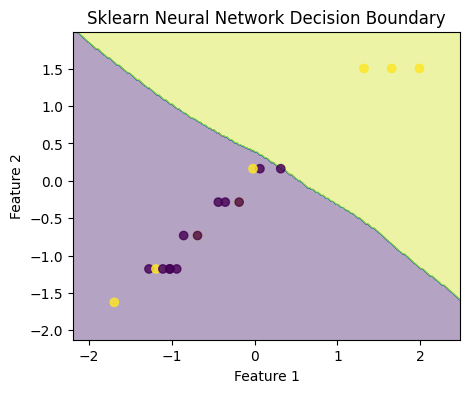

Custom NN Training Accuracy: 0.7375
Custom NN Test Accuracy: 0.7000
Scikit-learn MLPClassifier Test Accuracy: 0.7500


In [27]:
file = r"../tests/data/chddata.csv"

test_classification(
    file_path=file,
    hidden_layers=[32],
    output_size=1,
    hidden_activation="sigmoid",
    output_activation="sigmoid",
    optimizer="adam",
    learning_rate=0.001,
    use_regularization=False,
    lambda_=0.001,
    initializer="normal",
)

## Grid seach for hidden activation and learning rate

| Parameter          | Value     |
| ------------------ | --------- |
| input_size         | 2         |
| hidden_layers      | [32]      |
| output_size        | 1         |
| optimizer          | "adam"    |
| output_activation  | "sigmoid" |
| use_regularization | False     |


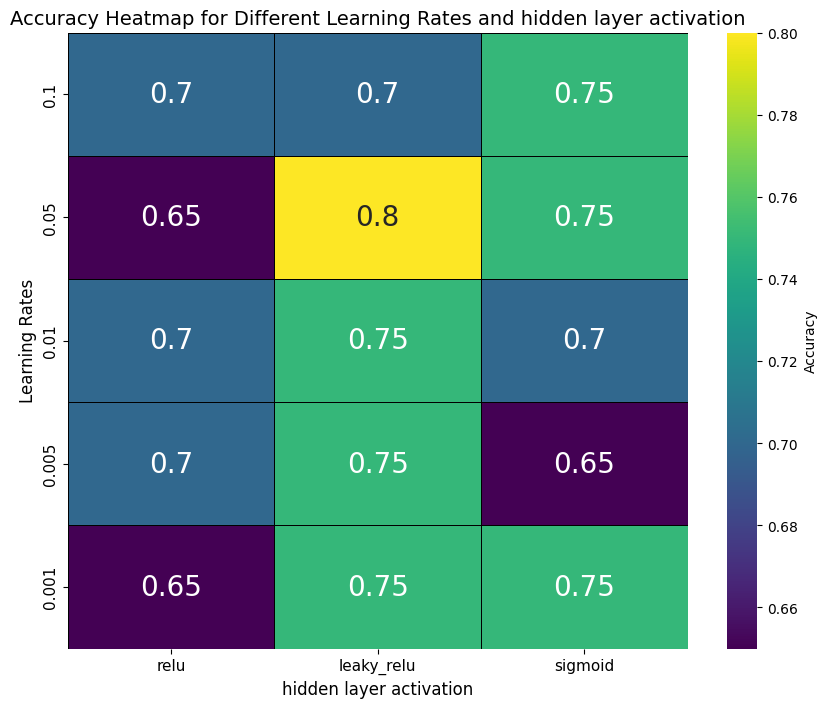

In [4]:
X_train, X_test, y_train, y_test, X_train_minmax, X_test_minmax = (
    load_classification_data(file)
)

activations = ["relu", "leaky_relu", "sigmoid"]
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
accuracies = []
for lr in learning_rates:
    for a in activations:
        NN = NeuralNetwork(
            input_size=X_test.shape[1],
            hidden_layers=[32],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation=a,
            use_regularization=False,
            lambda_=0.1,
        )

        NN.train_classifier(X_train, y_train, epochs=200)

        # y_pred = NN.predict_classes(X_test)
        accuracies.append(NN.accuracy_score(X_test, y_test))
        score = [NN.accuracy_score(X_train, y_train), NN.accuracy_score(X_test, y_test)]


plot_accuracy_heatmap(
    accuracies,
    learning_rates,
    activations,
    "Learning Rates",
    "hidden layer activation",
    "Grid Search for Learning Rates and hidden layer activation",
)

# Grid search for hidden activation and learning rate with regularization

| Parameter          | Value     |
| ------------------ | --------- |
| input_size         | 2         |
| hidden_layers      | [32]      |
| output_size        | 1         |
| optimizer          | "adam"    |
| output_activation  | "sigmoid" |
| use_regularization | True      |
| lambda\_           | 0.1       |


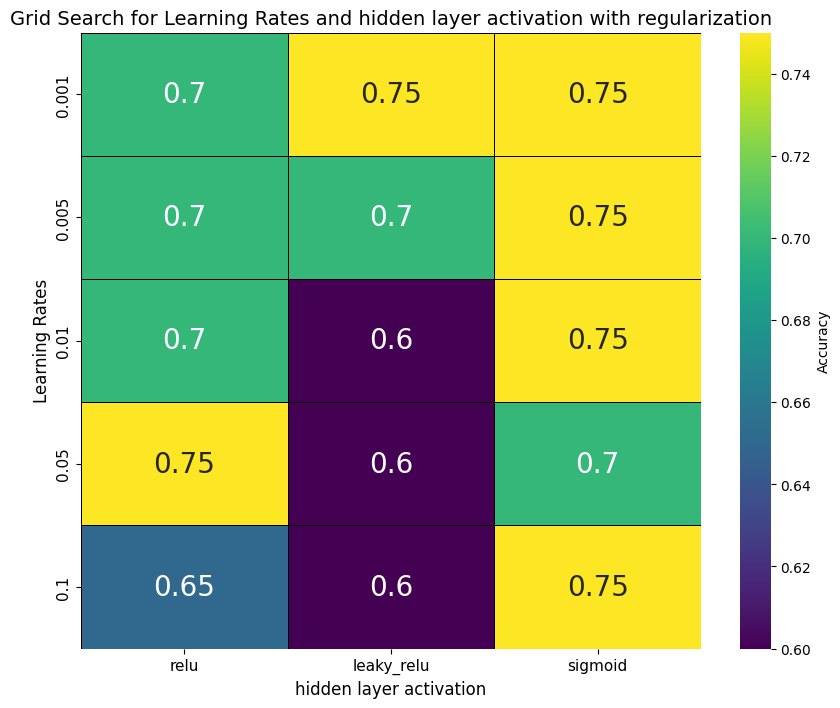

In [10]:
activations = ["relu", "leaky_relu", "sigmoid"]
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
accuracies = []
for lr in learning_rates:
    for a in activations:
        NN = NeuralNetwork(
            input_size=X_test.shape[1],
            hidden_layers=[32],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation=a,
            use_regularization=True,
            lambda_=0.1,
        )

        NN.train_classifier(X_train, y_train, epochs=200)

        # y_pred = NN.predict_classes(X_test)
        accuracies.append(NN.accuracy_score(X_test, y_test))
        score = [NN.accuracy_score(X_train, y_train), NN.accuracy_score(X_test, y_test)]


plot_accuracy_heatmap(
    accuracies,
    learning_rates,
    activations,
    "Learning Rates",
    "hidden layer activation",
    "Grid Search for Learning Rates and hidden layer activation with regularization",
)

## Grid search for hidden layers and hidden activation without regularization

| Parameter          | Value     |
| ------------------ | --------- |
| input_size         | 2         |
| output_size        | 1         |
| optimizer          | "adam"    |
| output_activation  | "sigmoid" |
| use_regularization | False     |
| learning_rate      | 0.01      |


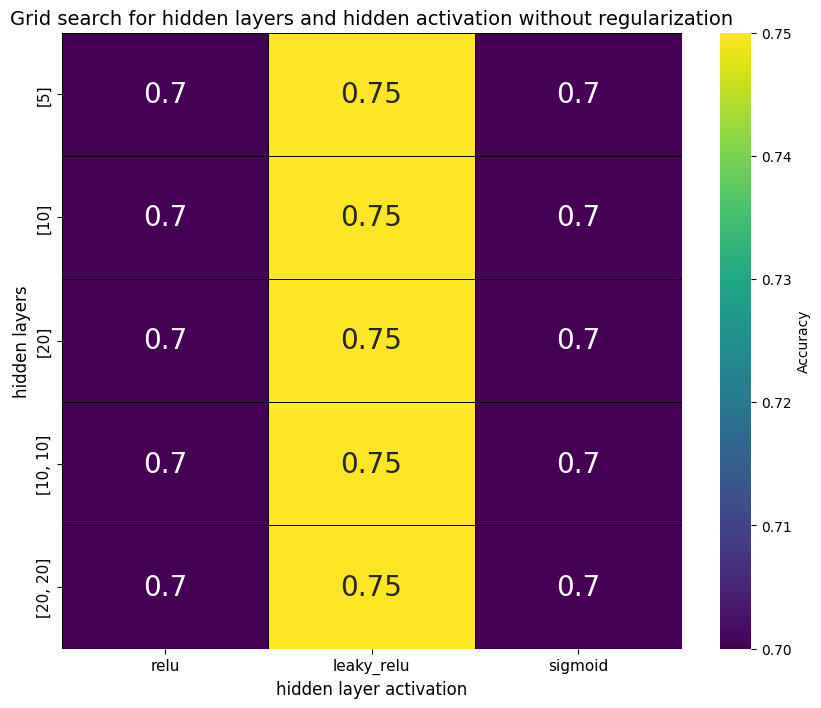

In [7]:
activations = ["relu", "leaky_relu", "sigmoid"]
hidden_layers = [[5], [10], [20], [10, 10], [20, 20]]
accuracies = []
for hl in hidden_layers:
    for a in activations:
        NN = NeuralNetwork(
            input_size=X_test.shape[1],
            hidden_layers=hl,
            output_size=1,
            learning_rate=0.01,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation=a,
            use_regularization=False,
            lambda_=0.01,
        )

        NN.train_classifier(X_train, y_train, epochs=200)

        # y_pred = NN.predict_classes(X_test)
        accuracies.append(NN.accuracy_score(X_test, y_test))
        score = [NN.accuracy_score(X_train, y_train), NN.accuracy_score(X_test, y_test)]


plot_accuracy_heatmap(
    accuracies,
    hidden_layers,
    activations,
    "hidden layers",
    "hidden layer activation",
    "Grid search for hidden layers and hidden activation without regularization",
)

## Grid search for regularization and learning rate

| Parameter          | Value        |
| ------------------ | ------------ |
| input_size         | 2            |
| output_size        | 1            |
| optimizer          | "adam"       |
| output_activation  | "sigmoid"    |
| use_regularization | True         |
| hidden_layers      | [32]         |
| hidden_activation  | "leaky_relu" |


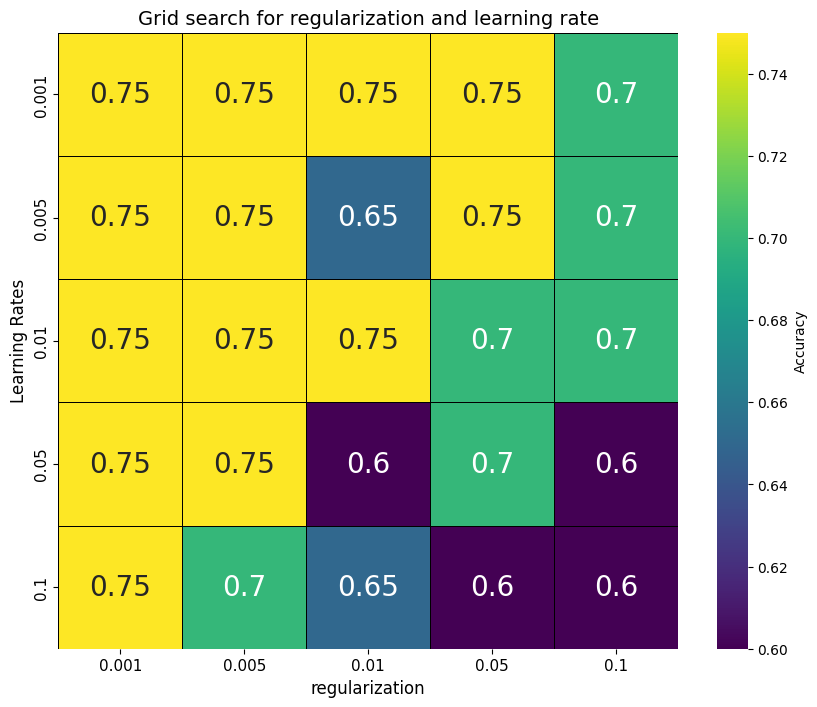

In [14]:
regularizations = [0.001, 0.005, 0.01, 0.05, 0.1]

accuracies = []
for re in regularizations:
    for lr in learning_rates:
        NN = NeuralNetwork(
            input_size=2,
            hidden_layers=[32],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation="leaky_relu",
            use_regularization=True,
            lambda_=re,
        )

        NN.train_classifier(X_train, y_train, epochs=200)

        # y_pred = NN.predict_classes(X_test)
        accuracies.append(NN.accuracy_score(X_test, y_test))
        score = [NN.accuracy_score(X_train, y_train), NN.accuracy_score(X_test, y_test)]


plot_accuracy_heatmap(
    accuracies,
    learning_rates,
    regularizations,
    "Learning Rates",
    "regularization",
    "Grid search for regularization and learning rate",
)